# MessMaster: The Tidy Room Saga (part 1)

<!-- ![](media/backstory_pic.png) -->

<div>
<img src="media/backstory_pic.png" width="400"/>
</div>

Once upon a time, deep in the enchanted realm of Entropy Heights, there was a room so chaotic it defied understanding. The room's owner, an eccentric inventor named Ludwig, had spent years trying to make sense of the chaos but always failed. Every attempt to tidy the room only made it worse, and Ludwig started to believe the room was cursed.

Ludwig was no ordinary owner. He was a descendant of the great physicist Ludwig Boltzmann, the father of statistical mechanics and entropy. Inspired by his ancestor's work, Ludwig believed the room’s messiness was governed by the second law of thermodynamics: *entropy always increases*. To Ludwig, the room wasn’t just messy—it was a living experiment in chaos, where every object seemed to follow its own mysterious laws.

But there was a deeper problem: **Ludwig couldn’t even tell if a tile in the room was messy or not**. The objects in the room—books, toys, clothes—were scattered in such strange and unpredictable patterns that Ludwig’s intuition failed him.

In his desperation, Ludwig uncovered a dusty copy of 'Machine Learning: A Lecture Note,' rumored to be written by a wise and elusive scholar known only as 'The Guardian of Patterns.' The notes revealed a startling truth: the room’s messiness wasn’t a curse but the result of poorly trained parameters in a hidden energy function. 

Now, Ludwig needs help. That’s where you come in. As apprentices of the Guardian of Patterns, your mission is to help Ludwig uncover the basic principles of machine learning, starting with classification. Your task is threefold:

- Define the energy function that governs the room’s state. (parameterization)
- Estimate its parameters by learning from the data. (learning)
- Infer the missing pieces to make sense of the room’s chaos. (inference)

By mastering these steps, you’ll equip Ludwig with the tools to restore balance to the messiest room in the world!

---
## 1. The Door of Mysteries: Prove Your Knowledge of Energy Function

<div>
<img src="media/mystical_door.png" width="400"/>
</div>

To enter, the mystical door challenges your knowledge on **'energy function'** in the context of room tidiness. Only by answering correctly can you proceed to organize the chaos within.

An energy function $e$ assigns a real value to an observed instance of a latent instance $(x,z)$ and is parameterized by a multi-dimension vector $\theta$.

$$e: \mathcal{X}\times\mathcal{Z}\times\mathcal{\Theta}\mapsto\mathbb{R}.$$

**Q1a**. What does the energy function represent in the context of room tidiness?

Answer: It represents how tidy the room is. Lower energy means it's more tidy.

**Q1b**. Is low energy or high energy state preferred?

Answer: Low energy state is preferred because our goal is to minimize the energy.

**Q1c**. Given some examples of what $x,z,\theta$ would be in the context of room tidiness.

Answer: 
- Observed instance $x$: stuffs in the room
- Latent instance $z$: room owner's cleaning habits
- Parameter $\theta$: personal preference. e.g., one may think books on a bookshelf is tidy, while another person may require them to be alphabetically sorted

**Q1d**. The Door heard that you are an expert in telling if a room is tidy or not, based on your previous experience of seeing all kinds of rooms ($x$) and being told whether or not they are messy ($y$). 

Assume there is no latent variable involved in evaluating room messiness, your energy function for classifying tidy room would take the form $e: (\mathcal{X}\times\mathcal{Y}) \times \emptyset \times \Theta \mapsto \{0,1\}$

Do you agree with the door? If yes, explain why. If no, rewrite it.

**Answer**: No. In the case of binary classification, $\mathcal{Y}=\{0,1\}$, but it does not change the type of the energy. In inference, our classification output would be $\{0,1\}$. For energy function, the output type remains $\mathbb{R}$. 

The correct form should be $e: (\mathcal{X}\times\mathcal{Y}) \times \emptyset \times \Theta \mapsto \mathbb{R}$, where $\mathcal{Y}$ can be written as $\{0,1\}$.

**Q1e.** Given your energy function for classifying a tidy room, how would you run inference? i.e., given a new observed room $x'$, how do you infer if it's messy ($y'$) based on your energy function?

Answer: $$y'=\argmin_{y\in\mathcal{Y}} e((x',y),\emptyset,\theta).$$

**Q1f.** Apart from classifying a tidy room, The Door is also interested in giving a room a continuous score of "tidiness". What is this problem called in ML and how do we define it as a form of energy learning?

Answer: Regression. It's the same as classification, except $\mathcal{Y}$ is continuous.

**Q1g**. The Door also wants to infer one's cleaning habits (good v.s. bad) without any labels. What is this problem called in ML? How do we run its inference using energy function?

Answer: Clustering. $$z' = \argmin_{z\in\mathcal{Z}} e(x,z,\theta).$$

**Q1h**. The Door heard that what earth humans refer to as "machine learning" is usually inferring $\theta$. Assuming there is no latent variable, how would you write the inference as a minimization of the expected energy?

$$\theta' = \argmin_{\theta\in\Theta} e(x,\emptyset,\theta).$$

**Q1i**. What if learning a desirable $\theta$ is hard and we want to penalize some undesirable outcomes? How does this change our minimization objective and what is this called in ML?

Answer: Regularization. $$\theta' = \argmin_{\theta\in\Theta} e(x,\emptyset,\theta) - R(\theta).$$

You have proven your understanding of energy functions to the magical door, but the journey has just begun. To bring order to the room, you must tune the parameters of the energy function. Only then will it correctly predict tidy and messy zones. The door opens, revealing the Trials of the Mess Guardians.

---


## 2. The Trials of the Mess Guardians: Optimizing Parameters with Loss

<div>
<img src="media/loss_guardians.png" width="400"/>
</div>

As you step into the room, three Mess Guardians appear, each holding the secrets to taming chaos. They offer you a challenge: to define an energy function that can distinguish tidy zones from messy ones and evaluate its performance using different loss spells. Only by mastering these spells can you take a step closer to restoring order.

**Q2a.** Naive inference of classification energy function is costly because it entails iterating all possible labels. How should we parameterize the energy function for a classification problem to reduce its computation cost of inference?

$$\hat{y}(x) = \argmin_{y} e((x,y),\emptyset,\theta).$$

Answer:

The key of parallelization is to factorize $x$ and $y$ in the energy function. This way, we can pre-compute the embedding of $x$, and calculate all the $y$-related expression in parallel. Specifically we write

$$e((x,y),\emptyset,\theta) = \mathbb{1}(y)^T f(x,\theta),$$

where $\mathbb{1}$ is a one-hot vector and $f: \mathcal{X}\times\Theta \mapsto \mathbb{R}^{|\mathcal{Y}|}$ is the feature extractor.




**Q2b.** Suppose the feature extractor is linear, what are the parameters to learn and how do we learn them with a dataset $D=\{x_i,y_i\}_{i=1}^n$ with $n$ examples?

Answer: 

Linear extractor: $$f(x,\theta)=Wx+b.$$

Learnable parameters: $$\theta = \{W,b\}.$$

How we learn them: empirical risk minimization. (minimizing loss on an observed set of data)

$$\hat{\theta} = \min_{\theta\in\Theta}\sum_{i=1}^n L((x_i,y_i),\theta).$$

**Q2c.** Each Mess Guardian uses a different loss function for learning the parameters. The Guardian of Absolute uses zero-one loss. Explain its name, write down its definition and its weakness.

Answer: 

The name "zero-one loss" comes from the fact that it assigns a loss of 0 to correct predictions and a loss of 1 to incorrect predictions. 

$$L_{0-1}((x,y),\theta) = \mathbb{1}(y\neq\hat{y}(x)).$$

This loss function is not differentiable, so we cannot use gradient descent to optimize it.


**Q2d.** The Guardian of Margins uses margin (hinge) loss. Explain its name, write down its definition. What is it called when the margin is set to 0? How does a zero margin change the update rule?


Answer: 

Margin loss is a "soft" proxy of zero-one loss that is easier to optimize. The goal is to make the energy associated with the true outcome lower (by some margin $m$) than the energy associated with any other outcome. 

$$
e((x,y'),\emptyset,\theta) - e((x,y),\emptyset,\theta) \geq m, \forall y'\neq y.$$

Rearranging the inequality, we get

$$m  + e((x,y),\emptyset,\theta) - e((x,y'),\emptyset,\theta) \leq 0, \forall y'\neq y.$$

We want to penalize when the margin is violated. So the loss function is

$$L_{\text{margin}}((x,y),\theta) = \max(0,m+e((x,y),\emptyset,\theta)-e((x,y'),\emptyset,\theta)).$$

It is also called hinge loss because of the "hinge" shape of the loss function with linear feature extractor. (The y value is zero until the margin is violated, then it increases linearly.)

When the margin is set to 0, the loss function is called perceptron loss. With this loss function, we only update the parameters when the label is incorrectly classified. This is because given correct prediction, it must be the label with the lowest energy. And without the margin requirement, the inequality is already satisfied.

**Q2e**. The Guardian of Probabilities uses cross-entropy loss. 

i. How do we connect the energy function to categorical probabilities?

ii. Write down its definition.

iii. Derive its gradient with respect to $\theta$.

iv. What does the gradient tell us about the update rule?


Answer:

i. We derive it using constrained optimization. The objective comes from the principles of maximum entropy and the stability of low energy states. The constraints come from definition of probabilities.

Specifically we maximize $\sum p_i \log p_i + \beta\sum p_i a_i$, where $a_i$ is the energy of the $i$-th outcome ($a_i = e((x,y_i),\emptyset,\theta)$). The constraints are $\sum p_i = 1$ (normalization) and $p_i \geq 0$ (non-negativity). The $\beta$ is the inverse temperature, where the default value is 1.

We can solve this using Lagrange multiplier. The solution is the softmax function.

$$p_i = \frac{\exp(-a_i)}{\sum_{i\neq j} \exp(-a_j)}.$$

ii. The loss function (or the negative log-likelihood) is

$$L_{\text{cross-entropy}}((x,y),\theta) = -\log p_y = -a_y + \log \sum_{y'\in\mathcal{Y}} \exp(-a_{y'}).$$

iii. The gradient is

$$\nabla_{\theta} L_{\text{ce}} = -\nabla_{\theta} a_y + \nabla_{\theta} \log \sum_{y'\in\mathcal{Y}} \exp(-a_{y'}).$$

$$\nabla_{\theta} L_{\text{ce}} = -\nabla_{\theta} a_y + \frac{\exp(-a_y)}{\sum_{y'\in\mathcal{Y}} \exp(-a_{y'})}\nabla_{\theta} a_y.$$

$$\nabla_{\theta} L_{\text{ce}} = -\nabla_{\theta} e((x,y),\emptyset,\theta) + \mathbb{E}_{y'\sim p(y'|x,\theta)} \nabla_{\theta} e((x,y'),\emptyset,\theta).$$

iv. The first part of the gradient shows that we decrease the energy of the true outcome. The second part shows that we increase the energy of all possible outcomes, as weighted by how likely they are.




---

## 3. The Chamber of Logical Chaos: Classification in Action

<div>
<img src="media/chamber_of_chaos.png" width="400"/>
</div>

You step into the Chamber of Logical Chaos, where mystical laser planes hover in mid-air. Each plane is filled with scattered objects—clothes, toys, and books—appearing as glowing points of light. The Guardians reveal that these planes represent patterns of disarray in the room.

To restore harmony, you must study how the objects are currently organized, classify them into appropriate bins, and predict the organization of subsequent planes. As you progress, the patterns on the planes evolve, growing more complex.

In [40]:
import matplotlib.pyplot as plt
import numpy as np
# def plot_training_evolution(X, y, model, iterations, title="Model Evolution"):
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

#     plt.figure(figsize=(15, 10))
#     for i in range(iterations):
#         # Train for one epoch
#         model.partial_fit(X, y, classes=np.unique(y))

#         # Compute decision function
#         if hasattr(model, "decision_function"):
#             Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
#         Z = Z.reshape(xx.shape)

#         # Plot decision boundary
#         plt.subplot(2, 5, i + 1)
#         plt.contourf(xx, yy, Z > 0, alpha=0.8, cmap="coolwarm")
#         plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
#         plt.title(f"{title} Iteration {i + 1}")
#         plt.xlabel("Feature 1")
#         plt.ylabel("Feature 2")

#     plt.tight_layout()
#     plt.show()


def plot_training_evolution(X, y, model, iterations=10, batch_size=1, title="Model Evolution"):
    """
    Plot decision boundary evolution over training, showing only seen data at each iteration.

    Args:
        X (ndarray): Input features.
        y (ndarray): Labels.
        model: The model (Perceptron, Logistic Regression, or SVM).
        iterations (int): Number of iterations to train.
        batch_size (int): Number of examples seen in each iteration.
        title (str): Plot title.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    plt.figure(figsize=(10, 5))

    num_samples = X.shape[0]
    for i in range(iterations):
        # Select a subset of the data (seen data)
        start_idx = (i * batch_size) % num_samples
        end_idx = start_idx + batch_size
        X_seen = X[start_idx:end_idx]
        y_seen = y[start_idx:end_idx]

        # Train the model on the seen data
        model.partial_fit(X_seen, y_seen, classes=np.unique(y))

        # Compute the decision boundary
        if hasattr(model, "decision_function"):
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary and seen data
        plt.subplot(2, 5, i + 1)
        plt.contourf(xx, yy, Z > 0, alpha=0.8, cmap="coolwarm")
        X_all = X[:end_idx]
        y_all = y[:end_idx]
        plt.scatter(X_all[:, 0], X_all[:, 1], c=y_all, edgecolor="k", label="Seen Data")
        plt.title(f"{title} Iteration {i + 1}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

In [41]:
!pip install pandas
import pandas as pd
df = pd.read_csv("secret/data/overlapped.csv")
X = df[["x1", "x2"]].values
y = df["y"].values


**Q3a. Perceptron**


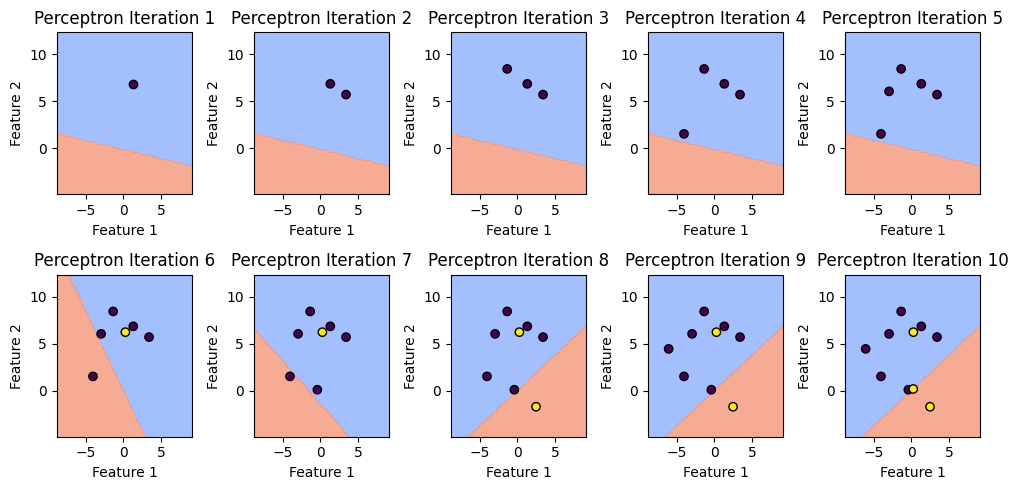

In [42]:

from sklearn.linear_model import Perceptron

def train_perceptron(X, y, iterations=10):
    perceptron = Perceptron(max_iter=1, tol=None, warm_start=True, random_state=42)
    plot_training_evolution(X, y, perceptron, iterations, title="Perceptron")

# Sequential and Random
train_perceptron(X, y, iterations=10)


**Q3b. Max Margin Classifier (SVM)**


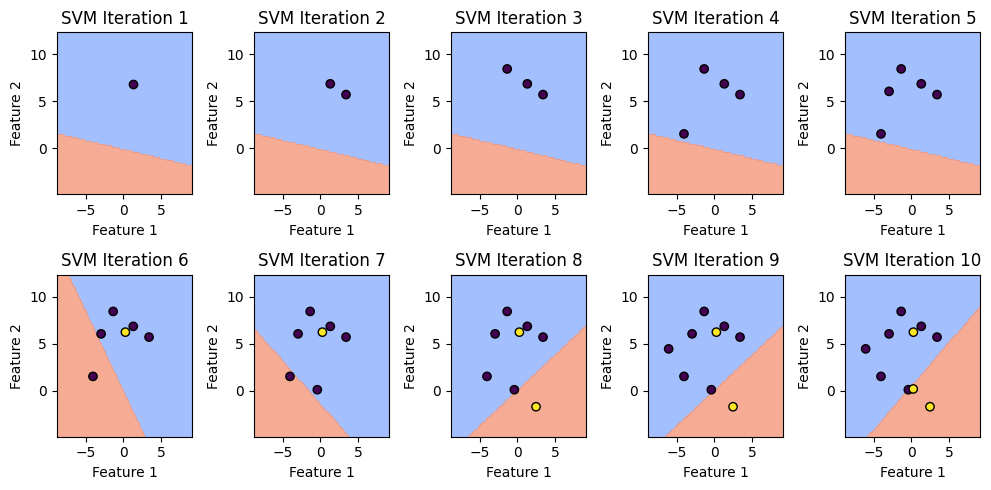

In [43]:

from sklearn.linear_model import SGDClassifier

def train_svm(X, y, iterations=10):
    svm = SGDClassifier(loss="hinge", max_iter=1, tol=None, warm_start=True, random_state=42)
    plot_training_evolution(X, y, svm, iterations, title="SVM")

# Sequential and Random
train_svm(X, y, iterations=10)


**Q3c. Logistic Regression**

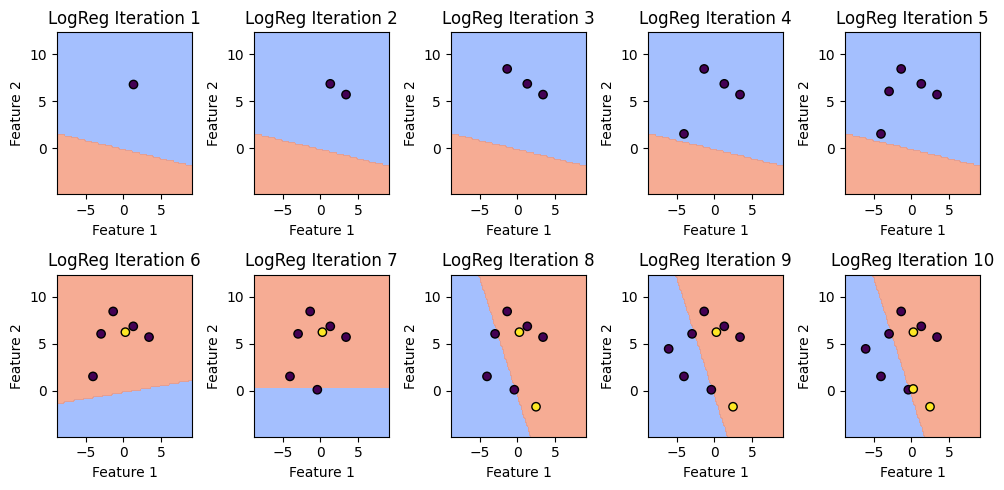

In [45]:
def train_logistic_regression(X, y, iterations=10):
    logistic = SGDClassifier(loss="log_loss", max_iter=1, tol=None, warm_start=True, random_state=42)
    plot_training_evolution(X, y, logistic, iterations, title="LogReg")

# Sequential and Random
train_logistic_regression(X, y, iterations=10)